# Step 1: Import relevant libraries

In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

import pandas_profiling as pp

from catboost import CatBoostClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import f1_score

# Step 2: Import the dataset

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Step 3: Data Profiling

In [4]:
train_data.head(5)

EmployeeNo                               Division        Qualification  \
0  YAK/S/00001         Commercial Sales and Marketing     MSc, MBA and PhD   
1  YAK/S/00002  Customer Support and Field Operations  First Degree or HND   
2  YAK/S/00003         Commercial Sales and Marketing  First Degree or HND   
3  YAK/S/00004         Commercial Sales and Marketing  First Degree or HND   
4  YAK/S/00006               Information and Strategy  First Degree or HND   

   Gender   Channel_of_Recruitment  Trainings_Attended  Year_of_birth  \
0  Female  Direct Internal process                   2           1986   
1    Male        Agency and others                   2           1991   
2    Male  Direct Internal process                   2           1987   
3    Male        Agency and others                   3           1982   
4    Male  Direct Internal process                   3           1990   

   Last_performance_score  Year_of_recruitment  Targets_met  Previous_Award  \
0                    12.5                 2011            1               0   
1                    12.5                 2015            0               0   
2                     7.5                 2012            0               0   
3                     2.5                 2009            0               0   
4                     7.5                 2012            0               0   

   Training_score_average State_Of_Origin Foreign_schooled Marital_Status  \
0                      41         ANAMBRA               No        Married   
1                      52         ANAMBRA              Yes        Married   
2                      42         KATSINA              Yes        Married   
3                      42           NIGER              Yes         Single   
4                      77       AKWA IBOM              Yes        Married   

  Past_Disciplinary_Action Previous_IntraDepartmental_Movement  \
0                       No                                  No   
1                       No                                  No   
2                       No                                  No   
3                       No                                  No   
4                       No                                  No   

  No_of_previous_employers  Promoted_or_Not  
0                        0                0  
1                        0                0  
2                        0                0  
3                        1                0  
4                        1                0

In [5]:
train_data.shape

(38312, 19)

In [6]:
train_data_profileReport = pp.ProfileReport(train_data)

In [7]:
train_data_profileReport

# Step 4: Data Cleaning

In [8]:
train_data.columns

Index(['EmployeeNo', 'Division', 'Qualification', 'Gender',
       'Channel_of_Recruitment', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'State_Of_Origin',
       'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
       'Promoted_or_Not'],
      dtype='object')

In [9]:
# Accounting for missingness in the 'Qualification' feature

train_data.Qualification = train_data.Qualification.fillna('Missing')

train_data.Qualification.isnull().sum()

0

In [10]:
# Generating new features from existing ones

train_data['Age'] = 2019 - train_data['Year_of_birth']

train_data['Work experience'] = 2019 - train_data['Year_of_recruitment']

In [11]:
train_data['Age'].describe()

count    38312.000000
mean        32.790666
std          7.646047
min         18.000000
25%         27.000000
50%         31.000000
75%         37.000000
max         69.000000
Name: Age, dtype: float64

In [12]:
train_data['Work experience'].describe()

count    38312.000000
mean         5.860305
std          4.261451
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         37.000000
Name: Work experience, dtype: float64

In [13]:
#dropping unused features
train_data_use = train_data.drop(['EmployeeNo', 'Year_of_recruitment','Year_of_birth','Promoted_or_Not'], axis = 1)

In [14]:
y = train_data['Promoted_or_Not']
X = train_data_use

# Step 5: Training and fitting the model

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [16]:
cat_features_indices = np.where(X.dtypes != np.float)[0]

In [17]:
cat_model = CatBoostClassifier(iterations = 500, depth = 8, learning_rate = 0.02, 
                               use_best_model = True, verbose=200, eval_metric = "F1")


cat_model.fit(X_train, y_train, cat_features = cat_features_indices, eval_set = (X_test, y_test), plot = True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0974395	test: 0.1020408	best: 0.1020408 (0)	total: 2.92s	remaining: 24m 15s
200:	learn: 0.4854369	test: 0.4740566	best: 0.4740566 (144)	total: 4m 44s	remaining: 7m 2s
400:	learn: 0.4921942	test: 0.4741784	best: 0.4752941 (317)	total: 8m 30s	remaining: 2m 5s
499:	learn: 0.4939042	test: 0.4771930	best: 0.4771930 (491)	total: 10m 29s	remaining: 0us

bestTest = 0.4771929825
bestIteration = 491

Shrink model to first 492 iterations.


# Step 6: Evaluating model performance

In [26]:
y_pred1 = cat_model.predict(X_test)

In [22]:
import scikitplot as skplt

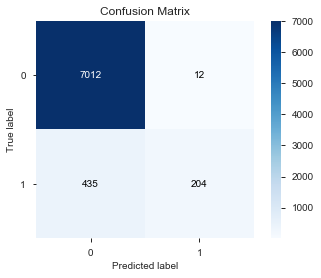

In [27]:
# Confusion matrix

skplt.metrics.plot_confusion_matrix(y_test, y_pred1)

In [43]:
# Feature importance

feature_importance_DF = cat_model.get_feature_importance(prettified = True)

feature_importance_DF


Feature Id  Importances
0                           Targets_met    48.389969
1                Training_score_average    19.003711
2                              Division    17.934427
3                Last_performance_score     4.727172
4                        Previous_Award     3.342746
5                       Work experience     2.484797
6                                   Age     0.974831
7                Channel_of_Recruitment     0.936179
8                         Qualification     0.539417
9                        Marital_Status     0.457257
10                   Trainings_Attended     0.416306
11             No_of_previous_employers     0.377668
12                      State_Of_Origin     0.326548
13  Previous_IntraDepartmental_Movement     0.045709
14             Past_Disciplinary_Action     0.034576
15                     Foreign_schooled     0.005745
16                               Gender     0.002942

# Step 7: Test data Profiling

In [30]:
 test_data.head(3)

EmployeeNo                                     Division  \
0  YAK/S/00005  Information Technology and Solution Support   
1  YAK/S/00011  Information Technology and Solution Support   
2  YAK/S/00015                      Research and Innovation   

         Qualification Gender   Channel_of_Recruitment  Trainings_Attended  \
0  First Degree or HND   Male        Agency and others                   2   
1                  NaN   Male  Direct Internal process                   2   
2     MSc, MBA and PhD   Male  Direct Internal process                   2   

   Year_of_birth  Last_performance_score  Year_of_recruitment  Targets_met  \
0           1976                     7.5                 2017            0   
1           1991                     0.0                 2018            0   
2           1984                     7.5                 2012            0   

   Previous_Award  Training_score_average State_Of_Origin Foreign_schooled  \
0               0                      65             FCT              Yes   
1               0                      69            OGUN              Yes   
2               0                      76            KANO              Yes   

  Marital_Status Past_Disciplinary_Action Previous_IntraDepartmental_Movement  \
0        Married                       No                                  No   
1        Married                       No                                  No   
2        Married                       No                                  No   

  No_of_previous_employers  
0                        1  
1                        1  
2                        1

In [31]:
test_data.shape

(16496, 18)

In [32]:
test_data_profileReport = pp.ProfileReport(test_data)

test_data_profileReport


# Step 8: Clean the test data

In [33]:
test_data.Qualification = test_data.Qualification.fillna('Missing')

test_data.Qualification.isnull().sum()

0

In [34]:
test_data['Age'] = 2019 - test_data['Year_of_birth']

test_data['Work experience'] = 2019- test_data['Year_of_recruitment']

In [35]:
test_data_use = test_data.drop(['EmployeeNo', 'Year_of_recruitment','Year_of_birth'], axis = 1)

# Step 9: Make Prediction

In [37]:
y_pred2 = cat_model.predict(test_data_use)

In [39]:
file = {'EmployeeNo': test_data.iloc[:, 0], 'Promoted_or_Not': y_pred2.astype('int64')}

submission = pd.DataFrame(file, columns = ['EmployeeNo', 'Promoted_or_Not'])

submission.to_csv('submission.csv', index = False)